In [1]:
import time
start = time.time() # start time
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely
from shapely.geometry import Point, Polygon
import fiona
import folium
import os
import math

In [2]:
df = pd.read_csv('./Data/1_apr_16 to 24_mar_18.csv')

In [3]:
df.index = pd.to_datetime(df['CloseDate'], infer_datetime_format=True, errors='coerce')
df['_index'] = df.index
df = df.sort_index()

In [4]:
for column in df:
    if df[column].dtype == 'bool':
        df[column] = (df[column]  == True).astype(int)

In [5]:
df = df[df['FullStreetAddress'].duplicated(keep=False)]

In [6]:
df['Time_Delta'] = df['FullStreetAddress'].apply(lambda x : df[df['FullStreetAddress'] == x]['_index'][0])
df['Time_Delta'] = df['_index'] - df['Time_Delta']
df = df[df['Time_Delta'].dt.days < 1095 ]

In [7]:
df = df[df['ClosePrice'] > 0]

In [8]:
numeric_columns = list(df._get_numeric_data().columns.values.flatten())

In [9]:
for column in numeric_columns:
    df['temp'] = 0
    df.loc[df['Time_Delta'].dt.days > 0, 'temp'] = df[df['Time_Delta'].dt.days > 0]['FullStreetAddress'].apply(lambda x: df[df['FullStreetAddress'] == x][column][0])
    df[column] = df[column] - df['temp']

In [10]:
df.loc[df['Time_Delta'].dt.days > 0, column] = df[df['Time_Delta'].dt.days > 0][column]

In [11]:
df = df.sort_values(['FullStreetAddress','_index'], ascending=[True, False])

In [12]:
df

,Ownership,FullStreetAddress,PostalCode,LotSizeArea,LivingArea,ListPrice,ClosePrice,Beds,ListDate,CloseDate,...,ContractDate,DualAgency,Exterior,OwnerFirstName,OwnerLastName,OwnerOfficePhone,YearBuilt,_index,Time_Delta,temp
CloseDate,,,,,,,,,,,,,,,,,,,,,
2016-05-13,Fee Simple,1005 URELL PL NE,0,0,2750,299000.0,375100.0,0,4/7/16,5/13/16,...,4/14/16,1,Brick and Siding,c/o,Agent,NaN,0,2016-05-13,203 days,1929
2015-10-23,Fee Simple,1005 URELL PL NE,20017,3191,0,500000.0,399900.0,4,9/15/15,10/23/15,...,10/8/15,0,"Brick, Brick and Siding, Brick Front",NaN,Prince,NaN,1929,2015-10-23,0 days,0
2016-07-01,Fee Simple,1012 BUCHANAN ST NE,0,0,1188,249000.0,249000.0,0,5/13/16,7/1/16,...,5/22/16,0,Brick,Kathryn,Russell,NaN,0,2016-07-01,184 days,1951
2015-12-30,Fee Simple,1012 BUCHANAN ST NE,20017,4018,0,350000.0,350000.0,3,10/28/15,12/30/15,...,12/15/15,1,Brick Front,NaN,check tax record,NaN,1951,2015-12-30,0 days,0
2018-02-16,Fee Simple,1028 SOUTHERN AVE SE,0,0,0,200100.0,215100.0,1,11/30/17,2/16/18,...,12/15/17,0,"Frame, Brick",CASED 1,LLC,NaN,0,2018-02-16,297 days,1977
2017-04-25,Fee Simple,1028 SOUTHERN AVE SE,20032,2820,0,159900.0,159900.0,3,11/1/16,4/25/17,...,11/14/16,1,Brick,TAX,RECORD,NaN,1977,2017-04-25,0 days,0
2017-08-23,Fee Simple,1031 46TH ST NE,0,0,-1307,351199.0,267399.0,0,7/5/17,8/23/17,...,7/18/17,0,Siding - Vinyl,SPHH,INVESTMENT LLC,NaN,0,2017-08-23,632 days,1910
2015-11-30,Fee Simple,1031 46TH ST NE,20019,3789,1307,33800.0,117600.0,3,6/24/14,11/30/15,...,10/16/14,1,Brick and Siding,Homesearch,.com,NaN,1910,2015-11-30,0 days,0
2018-03-13,Fee Simple,104 14TH ST NE,0,0,980,239000.0,267000.0,0,2/8/18,3/13/18,...,2/14/18,0,Brick,NaN,Lindsay,NaN,0,2018-03-13,683 days,1908


In [13]:
df = df.loc[df['PostalCode'] == 0]

In [14]:
df.head()

,Ownership,FullStreetAddress,PostalCode,LotSizeArea,LivingArea,ListPrice,ClosePrice,Beds,ListDate,CloseDate,...,ContractDate,DualAgency,Exterior,OwnerFirstName,OwnerLastName,OwnerOfficePhone,YearBuilt,_index,Time_Delta,temp
CloseDate,,,,,,,,,,,,,,,,,,,,,
2016-05-13,Fee Simple,1005 URELL PL NE,0,0,2750,299000.0,375100.0,0,4/7/16,5/13/16,...,4/14/16,1,Brick and Siding,c/o,Agent,NaN,0,2016-05-13,203 days,1929
2016-07-01,Fee Simple,1012 BUCHANAN ST NE,0,0,1188,249000.0,249000.0,0,5/13/16,7/1/16,...,5/22/16,0,Brick,Kathryn,Russell,NaN,0,2016-07-01,184 days,1951
2018-02-16,Fee Simple,1028 SOUTHERN AVE SE,0,0,0,200100.0,215100.0,1,11/30/17,2/16/18,...,12/15/17,0,"Frame, Brick",CASED 1,LLC,NaN,0,2018-02-16,297 days,1977
2017-08-23,Fee Simple,1031 46TH ST NE,0,0,-1307,351199.0,267399.0,0,7/5/17,8/23/17,...,7/18/17,0,Siding - Vinyl,SPHH,INVESTMENT LLC,NaN,0,2017-08-23,632 days,1910
2018-03-13,Fee Simple,104 14TH ST NE,0,0,980,239000.0,267000.0,0,2/8/18,3/13/18,...,2/14/18,0,Brick,NaN,Lindsay,NaN,0,2018-03-13,683 days,1908


In [15]:
df.isnull().sum().sort_values(ascending=False)

OwnerOfficePhone              481
BuildingFloors                481
WindowUnits                   481
BasementAreaUnfinished        478
AboveGradeAreaUnfinished      474
YearRenovated                 471
BasementAreaFinished          457
EnergyEfficiencyFeatures      446
AboveGradeAreaFinished        425
Garage                        424
GreenVerification             408
GarageType                    404
Roof                          400
Historic                      333
OwnerFirstName                305
Amenities                     170
ParkingIncludedInListPrice    169
Appliances                    162
BasementEntrance               70
TotalTaxes                     19
Beds                            0
ListDate                        0
CloseDate                       0
Type                            0
Stories                         0
ClosePrice                      0
OriginalListPrice               0
ListPrice                       0
LivingArea                      0
LotSizeArea   

In [16]:
df.dtypes

Ownership                              object
FullStreetAddress                      object
PostalCode                              int64
LotSizeArea                             int64
LivingArea                              int64
ListPrice                             float64
ClosePrice                            float64
Beds                                    int64
ListDate                               object
CloseDate                              object
Type                                   object
Stories                                 int64
OriginalListPrice                     float64
AboveGradeAreaFinished                float64
AboveGradeAreaUnfinished              float64
Amenities                              object
BasementAreaFinished                  float64
BasementAreaUnfinished                float64
BasementEntrance                       object
BathsFull                               int64
BathsHalf                               int64
DaysOnMarket                      

In [17]:
df = pd.get_dummies(data=df, columns=['Type', 'Amenities', 'BasementEntrance', 'EnergyEfficiencyFeatures', 
                                            'GarageType', 'GreenVerification', 'Heating', 'Historic', 'Parking', 
                                            'ParkingIncludedInListPrice', 'Roof', 'Appliances', 'Exterior'])

In [18]:
pd.options.display.max_rows = 4000

In [19]:
df.isnull().sum()

Ownership                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0
FullStreetAddress                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0
PostalCode                                      

In [20]:
X = df[['LivingArea', 'Beds', 'BathsFull', 'BathsHalf']]
y = df['ClosePrice']

In [21]:
import statsmodels.api as sm

/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
model = sm.OLS(y,X).fit()

y_pred = model.predict(X)

In [23]:
# from sklearn.linear_model import LinearRegression

# linreg = LinearRegression(fit_intercept=False)
# linreg.fit(X, price)

# print(linreg.coef_)

In [24]:
# linreg.predict(X)

In [25]:
# yhat = np.dot(X, beta_vec)
# yhat

In [26]:
# print('Multiple regression MSE:', np.mean((price-yhat)**2))

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df['y_pred'] = y_pred
df['Residuals'] = df['ClosePrice'] - df['y_pred']

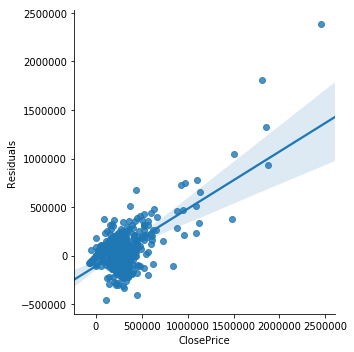

In [29]:
%matplotlib inline

sns.lmplot(x='ClosePrice', y='Residuals', data=df)

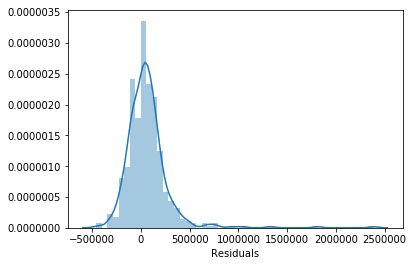

In [30]:
sns.distplot(df['Residuals'])

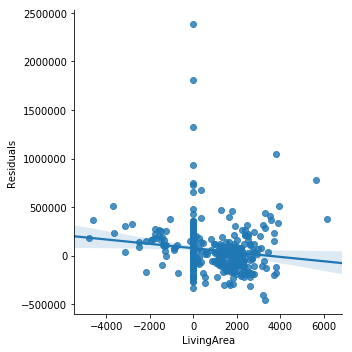

In [31]:
sns.lmplot(x='LivingArea', y='Residuals', data=df)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClosePrice   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           7.40e-99
Time:                        18:14:17   Log-Likelihood:                -6633.7
No. Observations:                 481   AIC:                         1.328e+04
Df Residuals:                     477   BIC:                         1.329e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LivingArea    37.0111      8.387      4.413      0.000      20.531      53.491
Beds        4.263e+04   1.57e+04      2.718      0.007    1.18e+04    7.34e+04
BathsFull   1.609e+05   1.08e+04     14.929      0.000     1.4e+05    1.82e+05
BathsHalf   1.111e+05   1.75e+04      6.356      0.000    7.68e+04    1.45e+05
==============================================================================
Omnibus:                      454.757   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20823.223
Skew:                           3.971   Prob(JB):                         0.00
Kurtosis:                      34.240   Cond. No.                     2.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""